# Prepare data for training
## First level tree classes: IMPROVE, DECLINE, PERMANENT

In [45]:
import pandas as pd
from _datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#df = pd.read_csv('20210106_catalogueSampleNormClasses.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])
# df = pd.read_csv('20210116_catalogueSampleNormClasses.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])
df = pd.read_csv('dataset/20210604_catalogueSampleNormClasses.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])

df.head()

,source,condition,fr0,fr1,fr2,fr3,fr4,fr5,fr6,fr7,Sentence,CEsnippet
0,MAYO,Acute kidney failure,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,Acute kidney failure — also called acute renal...,Acute kidney failure — also called acute renal...
1,MAYO,Systemic mastocytosis,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,"Another type, aggressive systemic mastocytosis...","Another type, aggressive systemic mastocytosis..."
2,MAYO,Plague,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,Pneumonic plague progresses rapidly and may ca...,Pneumonic plague progresses rapidly and may ca...
3,MAYO,Dermatographia,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,"Rarely, dermatographia develops more slowly an...","Rarely, dermatographia develops more slowly an..."
4,NHS,Epiglottitis,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,The symptoms of epiglottitis usually develop q...,The symptoms of epiglottitis usually develop q...


In [47]:
#df.loc[df['fr3'].isnull(),'fr3f'] = ''
#df.loc[df['fr3'].notnull(), 'fr3f'] = ' *'

#df.loc[df['fr6'].isnull(),'fr6f'] = ''
#df.loc[df['fr6'].notnull(), 'fr6f'] = ' *'
df = df.query("fr0 != 'NONE'")

In [48]:
df.head()

,source,condition,fr0,fr1,fr2,fr3,fr4,fr5,fr6,fr7,Sentence,CEsnippet
0,MAYO,Acute kidney failure,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,Acute kidney failure — also called acute renal...,Acute kidney failure — also called acute renal...
1,MAYO,Systemic mastocytosis,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,"Another type, aggressive systemic mastocytosis...","Another type, aggressive systemic mastocytosis..."
2,MAYO,Plague,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,Pneumonic plague progresses rapidly and may ca...,Pneumonic plague progresses rapidly and may ca...
3,MAYO,Dermatographia,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,"Rarely, dermatographia develops more slowly an...","Rarely, dermatographia develops more slowly an..."
4,NHS,Epiglottitis,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,The symptoms of epiglottitis usually develop q...,The symptoms of epiglottitis usually develop q...


In [49]:
#df['reviewedTag'] = df.fr0 + (' ' + df.fr1).fillna('')+ (' ' + df.fr2).fillna('') + df.fr3f+ (' ' + df.fr4).fillna('')+ (' ' + df.fr5).fillna('')+ df.fr6f+ (' ' + df.fr7).fillna('')
#print(df.reviewedTag[0:3])
#df.head()

In [50]:
df.info()
df.fr0.value_counts(dropna=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 0 to 1986
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source     550 non-null    object 
 1   condition  550 non-null    object 
 2   fr0        550 non-null    object 
 3   fr1        409 non-null    object 
 4   fr2        409 non-null    object 
 5   fr3        409 non-null    float64
 6   fr4        409 non-null    object 
 7   fr5        409 non-null    object 
 8   fr6        409 non-null    object 
 9   fr7        409 non-null    object 
 10  Sentence   550 non-null    object 
 11  CEsnippet  548 non-null    object 
dtypes: float64(1), object(11)
memory usage: 55.9+ KB


IMPROVE      337
PERMANENT    141
DECLINE       72
Name: fr0, dtype: int64

In [51]:
df.drop_duplicates(subset=['Sentence'], keep = "first", inplace = True)
df.info()
df.fr0.value_counts(dropna=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 1986
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source     546 non-null    object 
 1   condition  546 non-null    object 
 2   fr0        546 non-null    object 
 3   fr1        405 non-null    object 
 4   fr2        405 non-null    object 
 5   fr3        405 non-null    float64
 6   fr4        405 non-null    object 
 7   fr5        405 non-null    object 
 8   fr6        405 non-null    object 
 9   fr7        405 non-null    object 
 10  Sentence   546 non-null    object 
 11  CEsnippet  544 non-null    object 
dtypes: float64(1), object(11)
memory usage: 55.5+ KB


IMPROVE      333
PERMANENT    141
DECLINE       72
Name: fr0, dtype: int64

In [52]:
#col = ['source','condition','CEsnippet','Sentence','reviewedTag','newTag']
#df = df[col]

df.columns
df.head()

,source,condition,fr0,fr1,fr2,fr3,fr4,fr5,fr6,fr7,Sentence,CEsnippet
0,MAYO,Acute kidney failure,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,Acute kidney failure — also called acute renal...,Acute kidney failure — also called acute renal...
1,MAYO,Systemic mastocytosis,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,"Another type, aggressive systemic mastocytosis...","Another type, aggressive systemic mastocytosis..."
2,MAYO,Plague,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,Pneumonic plague progresses rapidly and may ca...,Pneumonic plague progresses rapidly and may ca...
3,MAYO,Dermatographia,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,"Rarely, dermatographia develops more slowly an...","Rarely, dermatographia develops more slowly an..."
4,NHS,Epiglottitis,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,The symptoms of epiglottitis usually develop q...,The symptoms of epiglottitis usually develop q...


In [53]:
df.to_csv('dataset/'+str(date.today())+'_datasetFirstLevel.csv', index = False)

Text(0.5, 1.0, 'Number of sentences per class')

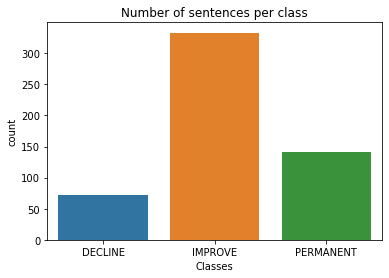

In [54]:
sns.countplot(x=df.fr0, data=df)
plt.xlabel('Classes')
plt.title('Number of sentences per class')

In [55]:
p = df['fr0'].value_counts()#.to_dict()
q = df['fr0'].value_counts(normalize=True)
r = pd.concat([p.rename('Count'),q.rename('Proportion')],axis=1)
print(r)

           Count  Proportion
IMPROVE      333    0.609890
PERMANENT    141    0.258242
DECLINE       72    0.131868
